In [97]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [98]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [99]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [100]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

In [101]:
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')

In [102]:
df.sample(5)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
27753,27754,62,unknown,casado,secundaria/superiores,no,367,no,no,fijo,221,7-sep-2021,1,189,5,sin_exito,no
3211,3212,57,services,casado,secundaria/superiores,no,204,no,no,fijo,70,24-jul-2021,3,-1,0,Sin Información,no
29890,29891,54,technician,soltero,universitarios,no,118,no,no,movil,280,5-apr-2021,1,-1,0,Sin Información,si
38386,38387,31,blue-collar,casado,secundaria/superiores,no,268,si,no,movil,93,20-nov-2021,2,-1,0,Sin Información,no
41888,41889,30,blue-collar,soltero,secundaria/superiores,no,75,si,no,Sin Información,123,16-may-2021,1,-1,0,Sin Información,no


In [103]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
9022,9023,35,services,casado,secundaria/superiores,no,2672,no,no,Sin Información,8,20-jun-2021,10,-1,0,Sin Información,no
30343,30344,45,housemaid,casado,secundaria/superiores,no,360,no,no,movil,113,4-may-2021,1,182,1,exito,no
9040,9041,52,admin.,divorciado,secundaria/superiores,no,0,si,no,Sin Información,206,26-may-2021,1,-1,0,Sin Información,no


In [104]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
19168,35,entrepreneur,casado,primaria,no,29397,si,no,movil,166,1,-1,0,Sin Información,no
2892,49,housemaid,soltero,primaria,no,1158,si,no,Sin Información,159,3,-1,0,Sin Información,no
3703,35,blue-collar,soltero,primaria,no,90,si,no,Sin Información,203,1,-1,0,Sin Información,no


In [105]:
#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 39)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito,target_no,target_si
10592,38,0,10,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8776,57,0,197,2,-1,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3999,42,139,166,1,-1,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5118,34,573,122,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
32526,32,0,66,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


**CLUSTER**

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Suponiendo que tienes tu DataFrame llamado 'df' con 50000 personas y diferentes columnas

# Separar las características categóricas y numéricas
categorical_features = df.select_dtypes(include=['object']).columns
numeric_features = df.select_dtypes(include=['int', 'float']).columns

# Construir el preprocesamiento de datos con codificación one-hot para características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Crear el pipeline de preprocesamiento y modelado
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('kmeans', KMeans(n_clusters=5, random_state=42))])

# Ajustar el pipeline al DataFrame
pipeline.fit(df)

# Obtener las etiquetas de los clústeres asignadas a cada muestra
cluster_labels = pipeline.named_steps['kmeans'].labels_

# Agregar las etiquetas de los clústeres al DataFrame original
df['Cluster'] = cluster_labels

# Analizar los resultados del clustering
print(df['Cluster'].value_counts())

Cluster
1    19177
0    12216
3     6361
2     3208
4     1484
Name: count, dtype: int64


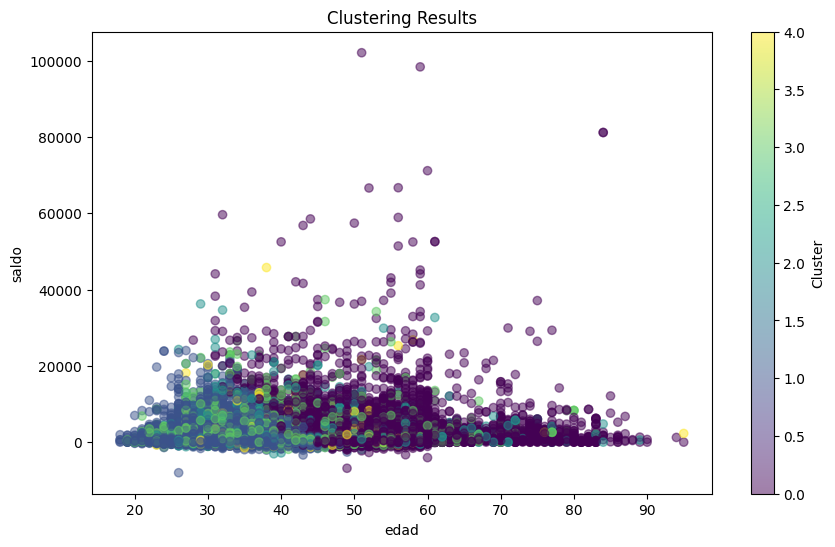

In [107]:

# Visualizar los resultados del clustering en un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['edad'], df['saldo'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering Results')
plt.xlabel('edad')
plt.ylabel('saldo')
plt.colorbar(label='Cluster')
plt.show()

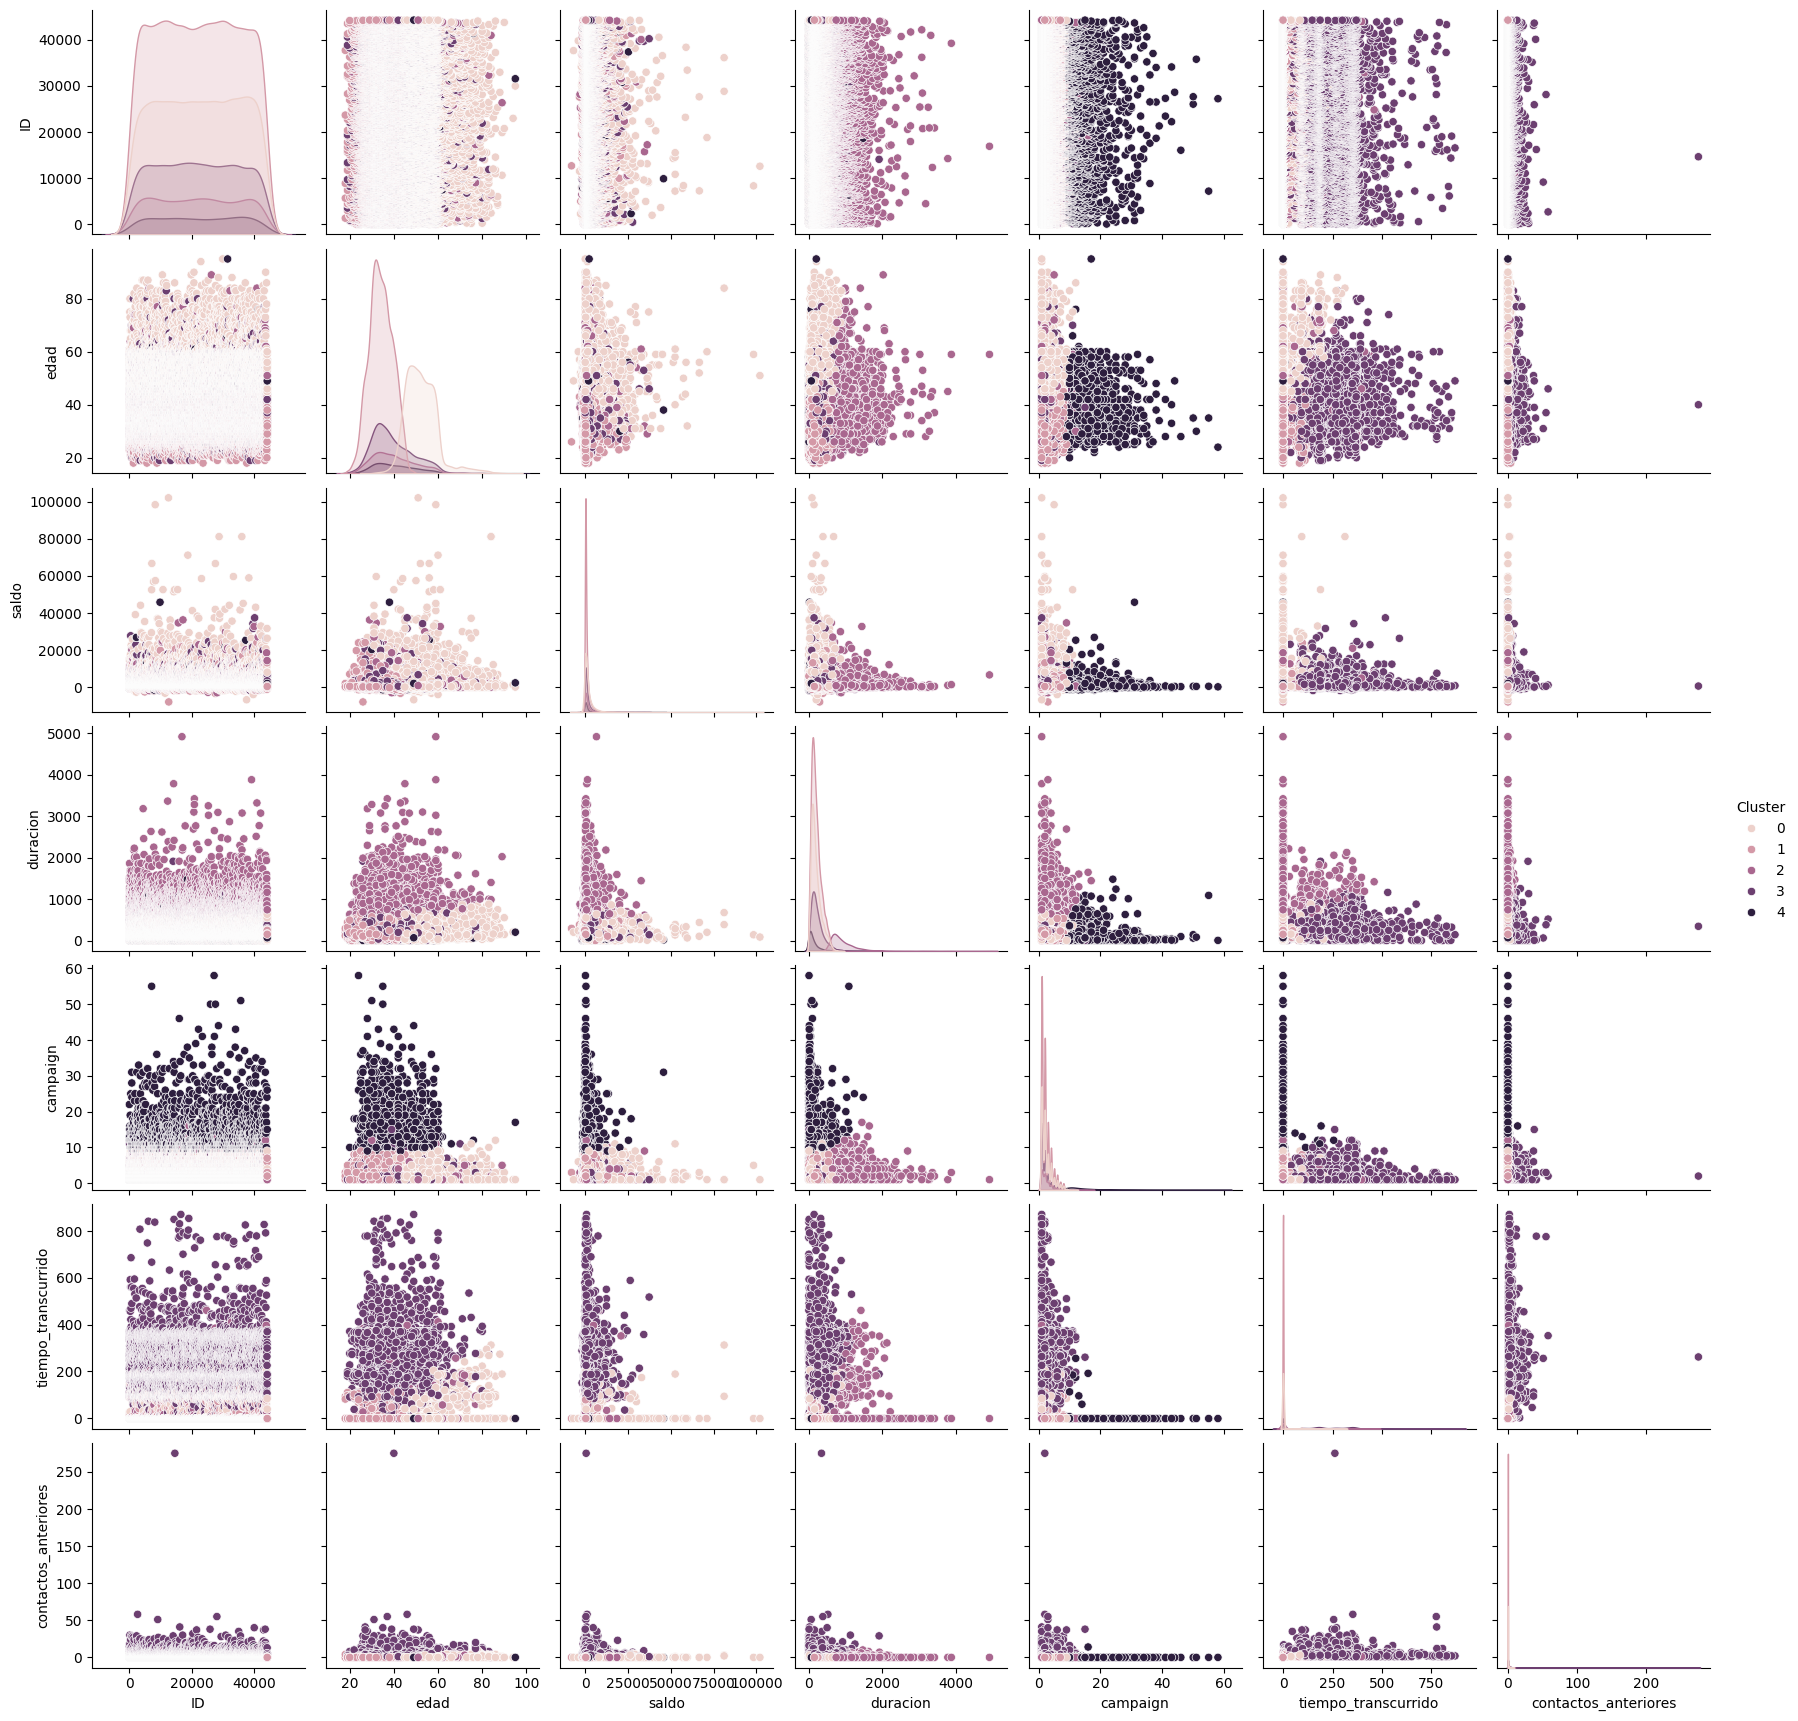

              ID                                                       \
           count          mean           std   min       25%      50%   
Cluster                                                                 
0        12216.0  22279.572446  12765.160460   2.0  11246.50  22388.5   
1        19177.0  22123.188664  12754.448355   1.0  11076.00  22191.0   
2         3208.0  21879.194202  12943.979971  22.0  10313.25  21910.0   
3         6361.0  21995.437353  12764.671810   4.0  10937.00  21821.0   
4         1484.0  22204.167116  12815.842522  33.0  11159.00  22060.0   

                               edad             ... tiempo_transcurrido  \
              75%      max    count       mean  ...                 75%   
Cluster                                         ...                       
0        33338.75  44250.0  12216.0  52.319253  ...                -1.0   
1        33106.00  44256.0  19177.0  34.045628  ...                -1.0   
2        33178.75  44254.0   3208.0  40.

In [108]:
import pandas as pd
import seaborn as sns

# Calcular estadísticas descriptivas para cada grupo
cluster_stats = df.groupby('Cluster').describe()

# Visualizar las distribuciones de características en cada grupo
sns.pairplot(df, hue='Cluster', diag_kind='kde')
plt.show()

# Imprimir estadísticas descriptivas
print(cluster_stats)


In [109]:
# Suponiendo que ya has asignado etiquetas de cluster al DataFrame df

# Dividir el DataFrame en subconjuntos para cada grupo de cluster
grupos = {}
for grupo, datos_grupo in df.groupby('Cluster'):
    grupos[grupo] = datos_grupo.copy()  # Copia los datos para evitar modificar el DataFrame original

# Visualizar los primeros registros de cada grupo
for grupo, datos_grupo in grupos.items():
    print(f"Grupo {grupo}:")
    print(datos_grupo.head())
    print("\n")


Grupo 0:
    ID  edad        trabajo estado_civil              educacion deuda  saldo  \
1    2    47       services      soltero  secundaria/superiores    no   3644   
4    5    56     management       casado         universitarios    no    217   
18  19    46    blue-collar       casado  secundaria/superiores    no      0   
20  21    49  self-employed   divorciado  secundaria/superiores    no   -478   
27  28    47    blue-collar       casado               primaria    no    699   

   vivienda prestamo    tipo_contacto  duracion fecha_contacto  campaign  \
1        no       no  Sin Información        83     9-jun-2021         2   
4        no       si            movil       121    21-jul-2021         2   
18       si       no  Sin Información       172    23-may-2021         3   
20       si       si            movil       291    20-nov-2021         1   
27       no       no            movil       203     5-aug-2021         1   

    tiempo_transcurrido  contactos_anteriores resulta

In [111]:
from sklearn.decomposition import PCA

# Suponiendo que ya has asignado etiquetas de cluster al DataFrame df

# Aplicar PCA para reducir la dimensionalidad de los datos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(columns=['cluster_labels']))  # Excluye la columna del clúster

# Visualizar los datos en un gráfico de dispersión
plt.figure(figsize=(10, 6))
for grupo, datos_grupo in grupos.items():
    indices_grupo = datos_grupo.index
    plt.scatter(X_pca[indices_grupo, 0], X_pca[indices_grupo, 1], label=f"Grupo {grupo}", alpha=0.5)
plt.title('Visualización de Grupos del Clúster (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

KeyError: "['cluster_labels'] not found in axis"